In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

full_df = pd.read_csv('/content/gdrive/MyDrive/Capstone/ed2017_data.csv',low_memory=False)
full_df = full_df.fillna(value=-1)
full_df.head()

,VMONTH,VDAYR,ARRTIME,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,ETHUN,ETHIM,RACEUN,RACER,RACERETH,ARREMS,AMBTRANSFER,NOPAY,PAYPRIV,PAYMCARE,PAYMCAID,PAYWKCMP,PAYSELF,PAYNOCHG,PAYOTH,PAYDK,PAYTYPER,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,IMMEDR,PAINSCALE,SEEN72,RFV1,RFV2,RFV3,RFV4,...,RX29CAT3,RX29CAT4,RX29V1C1,RX29V1C2,RX29V1C3,RX29V1C4,RX29V2C1,RX29V2C2,RX29V2C3,RX29V2C4,RX29V3C1,RX29V3C2,RX29V3C3,RX29V3C4,DRUGID30,PRESCR30,CONTSUB30,COMSTAT30,RX30CAT1,RX30CAT2,RX30CAT3,RX30CAT4,RX30V1C1,RX30V1C2,RX30V1C3,RX30V1C4,RX30V2C1,RX30V2C2,RX30V2C3,RX30V2C4,RX30V3C1,RX30V3C2,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
0,6,6,2056,72,-1.0,27,3,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,982,72,16,124,74,100,4,5,2,52200,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,21.58043
1,6,2,1417,64,-1.0,1,1,-7,1,1,1,1,-9,1,3,2,-7,0,0,0,1,0,0,0,0,0,3,1014,151,24,-9,-9,98,4,-8,2,14400,10100,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
2,6,2,2303,-7,-1.0,52,4,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,973,124,16,100,60,98,3,-9,2,15451,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
3,6,5,930,29,-1.0,5,1,-7,1,2,2,2,1,1,1,2,-7,0,1,0,0,0,0,0,0,0,1,983,81,22,-9,-9,99,4,-8,2,14400,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000
4,6,2,1332,20,-1.0,4,1,-7,1,1,2,2,1,1,1,2,-7,0,0,0,1,0,0,0,0,0,3,976,98,20,107,56,98,4,-9,2,55700,-9,-9,-9,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,2017,40100000,4,3723.12641,-1.00000


In [3]:
full_df.shape

(16709, 949)

In [4]:
subset_df = full_df.iloc[:,:36].drop(columns=["BLANK1"])

In [ ]:
subset_df.corr()

## PREPROCESSING ##



In [5]:
subset_df = full_df[["WAITTIME","AGE","TEMPF","SEX","IMMEDR","PAINSCALE"]]
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
0,72,27,982,2,4,5
1,64,1,1014,1,4,-8
2,-7,52,973,2,3,-9
3,29,5,983,2,4,-8
4,20,4,976,1,4,-9
...,...,...,...,...,...,...
16704,8,24,970,2,3,10
16705,23,36,976,1,3,8
16706,96,40,971,2,3,3
16707,33,75,971,1,3,9


In [6]:
subset_df.isnull().sum()

WAITTIME     0
AGE          0
TEMPF        0
SEX          0
IMMEDR       0
PAINSCALE    0
dtype: int64

In [7]:
subset_df = subset_df[subset_df["WAITTIME"] != -9]
subset_df = subset_df[subset_df["WAITTIME"] != -7]
subset_df = subset_df[subset_df["WAITTIME"] != 0]

subset_df = subset_df[subset_df["AGE"] != 0]
subset_df = subset_df[subset_df["SEX"] != 0]
subset_df = subset_df[subset_df["IMMEDR"] != 0]
subset_df = subset_df[subset_df["PAINSCALE"] != 0]

In [8]:
sexUniq = subset_df["SEX"].unique()
print(sexUniq)

[2 1]


In [9]:
subset_df = subset_df[subset_df["TEMPF"] != -9]

subset_df = subset_df[subset_df["IMMEDR"] != -9]
subset_df = subset_df[subset_df["IMMEDR"] != -8]

subset_df = subset_df[subset_df["PAINSCALE"] != -9]
subset_df = subset_df[subset_df["PAINSCALE"] != -8]

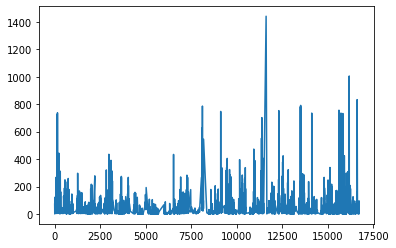

In [10]:
plt.plot(subset_df["WAITTIME"])

In [11]:
subset_df = subset_df[subset_df["WAITTIME"] < 45]
# subset_df = subset_df[subset_df["WAITTIME"] > 5]

In [12]:
subset_df[["WAITTIME"]] == 0

,WAITTIME
5,False
11,False
12,False
14,False
16,False
...,...
16699,False
16704,False
16705,False
16707,False


In [13]:
subset_df['TEMPF'] = subset_df['TEMPF'].apply(lambda x: (x*0.1 - 32) * 5/9 )
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
5,2,63,36.833333,2,3,2
11,18,27,36.944444,1,4,5
12,3,27,37.111111,2,3,10
14,9,44,36.777778,1,3,6
16,15,38,36.444444,1,4,6
...,...,...,...,...,...,...
16699,4,33,37.222222,2,4,3
16704,8,24,36.111111,2,3,10
16705,23,36,36.444444,1,3,8
16707,33,75,36.166667,1,3,9


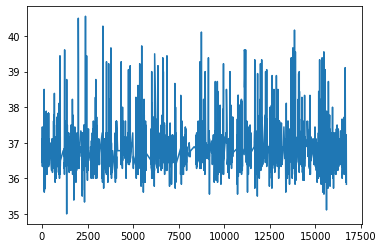

In [14]:
plt.plot(subset_df["TEMPF"])

In [15]:
subset_df = subset_df[subset_df["TEMPF"] > 34]
subset_df = subset_df[subset_df["TEMPF"] < 42]

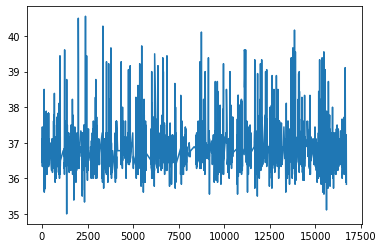

In [16]:
plt.plot(subset_df["TEMPF"])

In [17]:
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
5,2,63,36.833333,2,3,2
11,18,27,36.944444,1,4,5
12,3,27,37.111111,2,3,10
14,9,44,36.777778,1,3,6
16,15,38,36.444444,1,4,6
...,...,...,...,...,...,...
16699,4,33,37.222222,2,4,3
16704,8,24,36.111111,2,3,10
16705,23,36,36.444444,1,3,8
16707,33,75,36.166667,1,3,9


In [18]:
def categorical_temp (x):
  if x <= 36.6 :
    x = 1
  elif x > 36.6:
    x = 2
  return x

def categorical_age (x):
  if x < 15:
    x = 1
  elif  x > 25 and x <= 15:
    x = 2
  elif x > 15 and x <=25:
    x= 3
  elif x > 45 and x <=35:
    x= 4
  elif x > 65 and x <=45:
    x= 5
  elif x > 75 and x <=65:
    x= 6
  return x


In [19]:
# subset_df["WAITTIME"] = subset_df["WAITTIME"].apply(categorical_waitTime)
subset_df["TEMPF"] = subset_df["TEMPF"].apply(categorical_temp)
subset_df["AGE"] = subset_df["AGE"].apply(categorical_temp)

In [20]:
subset_df

,WAITTIME,AGE,TEMPF,SEX,IMMEDR,PAINSCALE
5,2,2,2,2,3,2
11,18,1,2,1,4,5
12,3,1,2,2,3,10
14,9,2,2,1,3,6
16,15,2,1,1,4,6
...,...,...,...,...,...,...
16699,4,1,2,2,4,3
16704,8,1,1,2,3,10
16705,23,1,1,1,3,8
16707,33,2,1,1,3,9


In [21]:
X = subset_df[["AGE","SEX","IMMEDR","PAINSCALE","TEMPF"]] 

y = subset_df["WAITTIME"]

In [22]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
X_train.shape, X_test.shape


((3416, 5), (855, 5))

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
stdscal = StandardScaler()
scale = stdscal.fit_transform(X_train)

In [26]:
X_train = pd.DataFrame(scale,columns=list(X_train.columns.values))
X_train

,AGE,SEX,IMMEDR,PAINSCALE,TEMPF
0,0.976849,1.134906,-0.455715,0.538588,0.627469
1,0.976849,-0.881131,3.627492,-0.267465,0.627469
2,0.976849,1.134906,0.565087,0.135561,-1.593705
3,0.976849,1.134906,-0.455715,-1.879572,0.627469
4,-1.023700,1.134906,-0.455715,0.135561,0.627469
...,...,...,...,...,...
3411,-1.023700,1.134906,1.585889,0.135561,0.627469
3412,-1.023700,-0.881131,0.565087,1.344642,0.627469
3413,0.976849,1.134906,-0.455715,0.538588,0.627469
3414,-1.023700,-0.881131,0.565087,-1.073519,0.627469


In [27]:
stdscal = StandardScaler()
scale = stdscal.fit_transform(X_test)

In [28]:
X_test = pd.DataFrame(scale,columns=list(X_test.columns.values))
X_test

,AGE,SEX,IMMEDR,PAINSCALE,TEMPF
0,1.017700,-0.788918,-0.447840,1.380843,-1.512766
1,-0.982607,-0.788918,0.551907,0.963957,-1.512766
2,-0.982607,1.267560,-1.447586,-0.703586,-1.512766
3,-0.982607,-0.788918,1.551653,0.547071,0.661041
4,-0.982607,-0.788918,0.551907,-1.120472,-1.512766
...,...,...,...,...,...
850,-0.982607,-0.788918,0.551907,-1.537358,0.661041
851,1.017700,-0.788918,-0.447840,1.380843,0.661041
852,-0.982607,1.267560,-0.447840,0.547071,0.661041
853,1.017700,-0.788918,-0.447840,0.963957,0.661041


## TensorFlow


In [29]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [30]:
model = Sequential()
input_layer = Input(shape=(X.shape[1],))
model.add(Dense(64, activation="relu",input_shape =(X.shape[1],) ))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1))

model.compile(loss="mean_squared_error" , optimizer="Adam", metrics=["mean_squared_error"])

In [31]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
1366/1366 [==============================] - 6s 2ms/step - loss: 259.5179 - mean_squared_error: 259.5179 - val_loss: 212.8771 - val_mean_squared_error: 212.8771
Epoch 2/100
1366/1366 [==============================] - 3s 2ms/step - loss: 169.6512 - mean_squared_error: 169.6512 - val_loss: 155.9102 - val_mean_squared_error: 155.9102
Epoch 3/100
1366/1366 [==============================] - 3s 2ms/step - loss: 134.9155 - mean_squared_error: 134.9155 - val_loss: 135.3340 - val_mean_squared_error: 135.3340
Epoch 4/100
1366/1366 [==============================] - 3s 2ms/step - loss: 123.7382 - mean_squared_error: 123.7382 - val_loss: 128.9420 - val_mean_squared_error: 128.9420
Epoch 5/100
1366/1366 [==============================] - 3s 2ms/step - loss: 120.9321 - mean_squared_error: 120.9321 - val_loss: 127.4325 - val_mean_squared_error: 127.4325
Epoch 6/100
1366/1366 [==============================] - 3s 2ms/step - loss: 120.4037 - mean_squared_error: 120.4037 - val_loss: 127.07

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

11.002986323340373
11.206529799870461


In [33]:
pred_train

array([[14.998022],
       [12.349526],
       [15.71028 ],
       ...,
       [14.998022],
       [15.729901],
       [15.726516]], dtype=float32)

In [34]:
pred = model.predict([[2,3,4,2,2]])
pred

array([[15.729845]], dtype=float32)

In [35]:
model.save('myModel.h5')

In [38]:
load_model = tf.keras.models.load_model("/content/myModel.h5")


In [39]:
pred_result = load_model.predict([[2,3,4,2,2]])
pred_result

array([[15.729845]], dtype=float32)